# ML Project Clustering

Problem 1:
There are various stocks for which we have collected a data set, which all stocks are 
apparently similar in performance

Problem 2:
How many Unique patterns that exist in the historical stock data set, based on 
fluctuations in price.

Problem 3:
Identify which all stocks are moving together and which all stocks are different from
each other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_stocks.csv')
data.shape

(41266, 502)

In [3]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
import os
os.getcwd()

'C:\\Users\\Admin\\0 ML new\\00 My Work\\6th june assignment'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [6]:
data_n = data.copy()
data_n.drop(['DATE','SP500'],inplace=True,axis=1)
data_n.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [7]:
cor = data_n.corr()
cor.shape

(500, 500)

In [8]:
cor_df = pd.DataFrame(data=cor.values, columns=cor.index, index = cor.index)
cor_df.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213


## Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

In [9]:
pos_cor = []
list = []
for col in cor_df.columns:
    for indx in cor_df.index:
        if indx not in list:
            if cor_df[indx][col] > 0.9 and cor_df[indx][col] != 1:
                a = str(indx) + ' and ' + str(col)
                pos_cor.append(a)
    list.append(col)       
print('List of Stock which are apparently similar in performance positively : ') 

print(pos_cor)

List of Stock which are apparently similar in performance positively : 
['NYSE.DAL and NASDAQ.AAL', 'NASDAQ.ATVI and NASDAQ.ADBE', 'NASDAQ.AVGO and NASDAQ.ADBE', 'NASDAQ.CBOE and NASDAQ.ADBE', 'NASDAQ.CTSH and NASDAQ.ADBE', 'NASDAQ.EA and NASDAQ.ADBE', 'NASDAQ.EQIX and NASDAQ.ADBE', 'NASDAQ.FB and NASDAQ.ADBE', 'NASDAQ.ISRG and NASDAQ.ADBE', 'NASDAQ.LKQ and NASDAQ.ADBE', 'NASDAQ.MNST and NASDAQ.ADBE', 'NASDAQ.MSFT and NASDAQ.ADBE', 'NASDAQ.NVDA and NASDAQ.ADBE', 'NASDAQ.PYPL and NASDAQ.ADBE', 'NASDAQ.VRSN and NASDAQ.ADBE', 'NYSE.A and NASDAQ.ADBE', 'NYSE.ACN and NASDAQ.ADBE', 'NYSE.AET and NASDAQ.ADBE', 'NYSE.AMT and NASDAQ.ADBE', 'NYSE.AON and NASDAQ.ADBE', 'NYSE.APH and NASDAQ.ADBE', 'NYSE.AVY and NASDAQ.ADBE', 'NYSE.BAX and NASDAQ.ADBE', 'NYSE.CAT and NASDAQ.ADBE', 'NYSE.CCL and NASDAQ.ADBE', 'NYSE.CI and NASDAQ.ADBE', 'NYSE.CNC and NASDAQ.ADBE', 'NYSE.COO and NASDAQ.ADBE', 'NYSE.DLPH and NASDAQ.ADBE', 'NYSE.EL and NASDAQ.ADBE', 'NYSE.FIS and NASDAQ.ADBE', 'NYSE.GPN and NASDAQ.ADBE'

In [10]:
len(pos_cor)

1865

In [11]:
1865/(500**2)

0.00746

In [12]:
neg_cor = []
list = []
for col in cor_df.columns:
    for indx in cor_df.index:
        if indx not in list:
            if cor_df[indx][col] < - 0.9 and cor_df[indx][col] != 1:
                a = str(indx) + ' and ' + str(col)
                neg_cor.append(a)
    list.append(col)       
print('List of Stock which are apparently similar in performance negatively : ') 

print(neg_cor)

List of Stock which are apparently similar in performance negatively : 
['NASDAQ.BBBY and NASDAQ.ADBE', 'NYSE.APC and NASDAQ.ADBE', 'NYSE.AZO and NASDAQ.ADBE', 'NYSE.FL and NASDAQ.ADBE', 'NYSE.GE and NASDAQ.ADBE', 'NYSE.HOG and NASDAQ.ADBE', 'NYSE.NBL and NASDAQ.ADBE', 'NYSE.NFX and NASDAQ.ADBE', 'NYSE.RRC and NASDAQ.ADBE', 'NYSE.SLB and NASDAQ.ADBE', 'NYSE.APC and NASDAQ.ATVI', 'NYSE.GWW and NASDAQ.ATVI', 'NYSE.HP and NASDAQ.ATVI', 'NYSE.MRO and NASDAQ.ATVI', 'NYSE.NBL and NASDAQ.ATVI', 'NYSE.RRC and NASDAQ.ATVI', 'NYSE.SLB and NASDAQ.ATVI', 'NASDAQ.CBOE and NASDAQ.BBBY', 'NASDAQ.CTSH and NASDAQ.BBBY', 'NASDAQ.NVDA and NASDAQ.BBBY', 'NASDAQ.PYPL and NASDAQ.BBBY', 'NASDAQ.VRSN and NASDAQ.BBBY', 'NYSE.AET and NASDAQ.BBBY', 'NYSE.AON and NASDAQ.BBBY', 'NYSE.AVY and NASDAQ.BBBY', 'NYSE.BAX and NASDAQ.BBBY', 'NYSE.BDX and NASDAQ.BBBY', 'NYSE.C and NASDAQ.BBBY', 'NYSE.CCL and NASDAQ.BBBY', 'NYSE.CI and NASDAQ.BBBY', 'NYSE.CNC and NASDAQ.BBBY', 'NYSE.COO and NASDAQ.BBBY', 'NYSE.HIG and NASDA

In [13]:
len(neg_cor)

617

In [14]:
617/(500**2)

0.002468

## Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [15]:
cor_df.iloc[0:5,0:5]

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000


In [16]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
feature = data_n.values
sc = StandardScaler()
X_scaled = sc.fit_transform(feature)

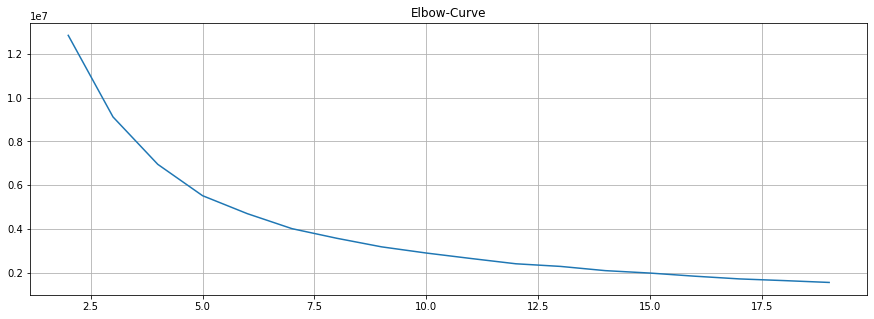

In [17]:
from sklearn.cluster import KMeans
X = X_scaled.copy()
wcss =[]
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20),wcss)
plt.grid(True)
plt.title('Elbow-Curve')
plt.show()

In [18]:
k_means = KMeans(n_clusters = 5)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
y_kmeans = k_means.fit_predict(X)
print(y_kmeans)

[1 1 1 ... 2 2 2]


Text(0.5, 1.0, 'Number of obsevation per Cluster')

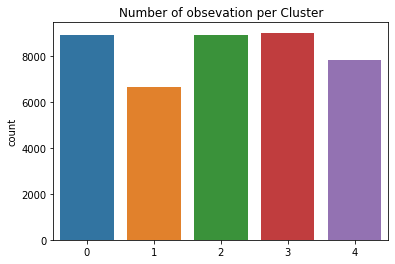

In [34]:
import seaborn as sns
sns.countplot(x=y_kmeans)
plt.title('Number of obsevation per Cluster')

Text(0.5, 1.0, 'Boxplot for SP500 according to Clusters')

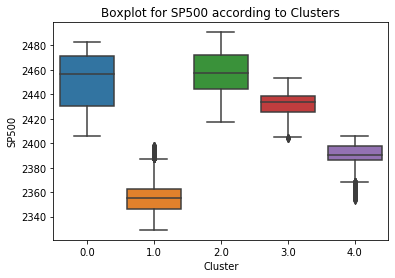

In [35]:
df = pd.DataFrame([data['SP500'],y_kmeans]).T
df.columns = ['SP500','Cluster']
sns.boxplot(x='Cluster',y='SP500',data = df)
plt.title('Boxplot for SP500 according to Clusters')